# Parameter tuning
In this notebook it is shown the difference in the resulting graph by changing the parameters.

We choose a reddit submission (reddit API are less restrictive) as an example and we build different graphs based on that submission by changing the parameters and then we visualize at the output.

##### Libraries imports

In [1]:
import sys
import matplotlib.pyplot as plt

if '../../src/' not in sys.path:
    sys.path.append('../../src/')
    
from crawler.viz.drawer import GraphDrawer
from crawler.argumentation.convert import common
from crawler.argumentation.mine.from_reddit import get_debate_graph

## 1. Choose the parameters to tune

In [2]:
submissionId = 'ffl9m5'

frameworks = [common.AF, common.BAF, common.WAF, common.BWAF]
modes = ['comments', 'users']
multiedges = [True, False]

## 2. Create graph from all the combination of parameters

In [3]:
%%time

graphs = dict()
for framework in frameworks:
    for mode in modes:
        for multiedge in multiedges:
            is_multiedge = 'multiedge' if multiedge else 'nomultiedge'
            name = f'{mode}_{framework}_{is_multiedge}_graph'
            graphs[name] = get_debate_graph(
                submissionId=submissionId, 
                mode=mode, 
                save=False, 
                multiedges=True, 
                framework=common.BWAF, 
                verbose=False
            )

CPU times: user 889 ms, sys: 27.2 ms, total: 916 ms
Wall time: 12.1 s


## 3. Visualize all the graphs

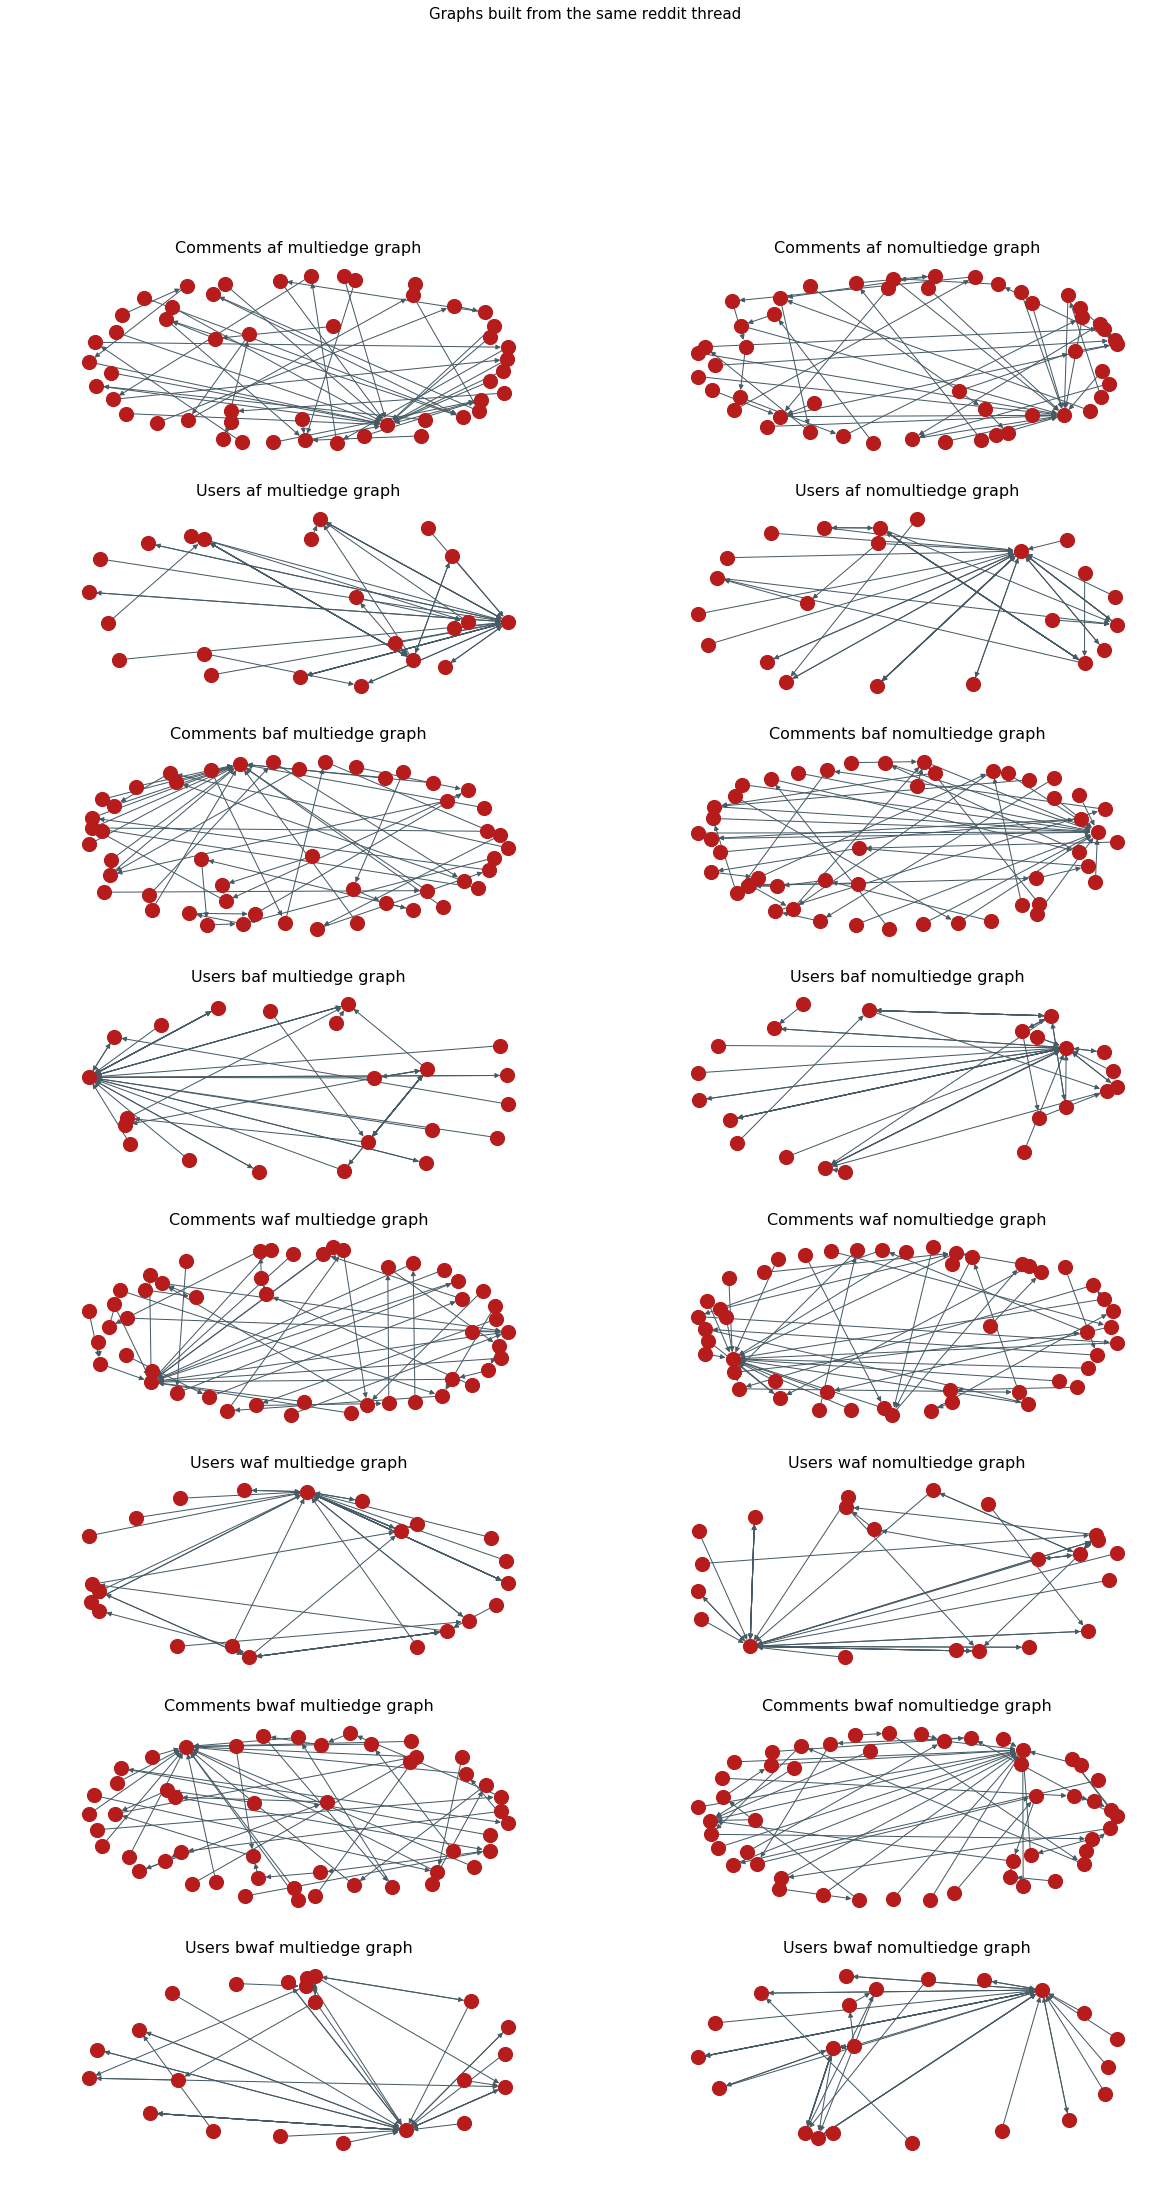

In [4]:
get_readable = lambda name: ' '.join(name. capitalize().split('_'))
num_charts = len(frameworks) * len(modes) * len(multiedges)

fig, axes = plt.subplots(nrows=num_charts//2, ncols=2, figsize=(20,35))
fig.suptitle('Graphs built from the same reddit thread', fontsize=15)

for i, (name, graph) in enumerate(graphs.items()):
    drawer = GraphDrawer(graph)
    drawer.draw(axes.flat[i], get_readable(name))